In [1]:
import numpy as np
import matplotlib.cm
import pandas as pd
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage
import pyqtgraph as pg
import tifffile
from pathlib import Path
import seaborn as sns

In [6]:
data_dir = Path(r'C:\Users\Firefly\Desktop\MRes_231\new_criteria')
ms_active = pd.read_csv(Path(data_dir, 'imagej_active.csv'))
ms_active = ms_active[(ms_active['expt'] == 'standard')&(ms_active['video'] != 'n')]
ms_active.index = np.arange(ms_active.shape[0])
label = pd.read_csv(Path(data_dir, 'fb with label.csv'))
label = label['Type']
ms_active['Type'] = label
ms_active = ms_active.iloc[:,1:]
ms_active

,Label,Ac,expt,Area,Perim.,Major,Minor,Angle,Circ.,Feret,FeretAngle,MinFeret,AR,Round,Solidity,video,Type
0,cancer_20201202_slip1_area2_long_acq_corr_long...,active,standard,299,64.527,20.848,18.261,45.220,0.902,22.472,57.724,19.000,1.142,0.876,0.945,y,3
1,cancer_20201202_slip1_area2_long_acq_corr_long...,active,standard,1591,158.853,55.944,36.210,142.057,0.792,59.548,130.914,38.891,1.545,0.647,0.957,y,3
2,cancer_20201203_slip1_area1_long_acq_corr_corr...,active,standard,138,42.870,13.823,12.711,65.554,0.944,14.866,42.274,13.000,1.088,0.920,0.917,y,2
3,cancer_20201203_slip1_area1_long_acq_corr_corr...,active,standard,264,59.113,18.420,18.249,102.841,0.949,20.000,126.870,18.000,1.009,0.991,0.945,y,2
4,cancer_20201203_slip1_area1_long_acq_corr_corr...,active,standard,279,60.770,19.306,18.400,122.992,0.949,20.616,112.834,19.000,1.049,0.953,0.941,y,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,cancer_20201219_slip2_area2_long_acq_long_acq_...,active,standard,784,113.740,34.259,29.138,82.864,0.762,36.797,137.203,30.000,1.176,0.851,0.905,y,2
320,cancer_20201219_slip2_area2_long_acq_long_acq_...,active,standard,2160,221.380,72.060,38.165,97.118,0.554,82.710,104.708,46.504,1.888,0.530,0.817,y,2
321,cancer_20201219_slip2_area2_long_acq_long_acq_...,active,standard,722,110.326,41.519,22.141,99.614,0.745,42.579,99.462,23.526,1.875,0.533,0.948,y,0
322,cancer_20201219_slip2_area2_long_acq_long_acq_...,active,standard,1025,123.782,40.805,31.983,62.757,0.841,41.773,78.959,33.541,1.276,0.784,0.933,y,2


In [8]:
ms = pd.read_csv(Path(data_dir, 'Results.csv'))
ms = ms[(ms['expt'] == 'standard') & (ms['Ac'] == 'inactive')]
ms

,Unnamed: 0,Label,Ac,expt,Area,Perim.,Major,Minor,Angle,Circ.,Feret,FeretAngle,MinFeret,AR,Round,Solidity
0,0,cancer_20201202_slip1_area2_long_acq_corr_long...,inactive,standard,308,64.184,20.242,19.374,90.018,0.940,21.190,109.290,20.000,1.045,0.957,0.940
1,1,cancer_20201202_slip1_area2_long_acq_corr_long...,inactive,standard,329,65.355,20.605,20.329,129.758,0.968,21.633,123.690,20.000,1.014,0.987,0.956
3,3,cancer_20201202_slip1_area2_long_acq_corr_long...,inactive,standard,256,59.012,18.459,17.658,3.521,0.924,19.925,162.474,18.156,1.045,0.957,0.926
4,4,cancer_20201202_slip1_area2_long_acq_corr_long...,inactive,standard,231,55.355,18.137,16.217,107.440,0.947,19.313,111.251,16.971,1.118,0.894,0.933
5,5,cancer_20201202_slip1_area2_long_acq_corr_long...,inactive,standard,303,65.012,21.797,17.699,105.996,0.901,22.804,105.255,18.336,1.232,0.812,0.934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3566,3585,cancer_20201219_slip2_area2_long_acq_long_acq_...,inactive,standard,234,61.698,21.485,13.867,97.273,0.772,22.561,77.196,14.000,1.549,0.645,0.912
3567,3586,cancer_20201219_slip2_area2_long_acq_long_acq_...,inactive,standard,427,83.355,24.863,21.866,134.332,0.772,29.206,141.953,23.929,1.137,0.879,0.934
3568,3587,cancer_20201219_slip2_area2_long_acq_long_acq_...,inactive,standard,484,93.740,36.684,16.799,21.999,0.692,40.853,21.541,19.036,2.184,0.458,0.934
3569,3588,cancer_20201219_slip2_area2_long_acq_long_acq_...,inactive,standard,224,65.113,24.333,11.721,15.865,0.664,26.249,17.745,14.000,2.076,0.482,0.931


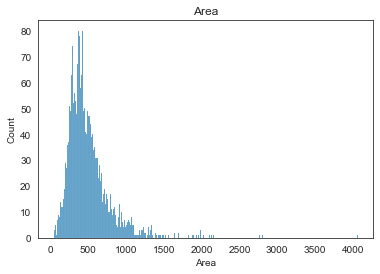

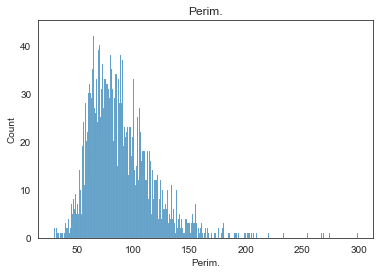

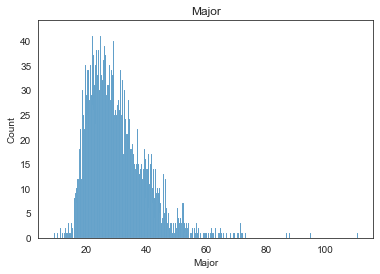

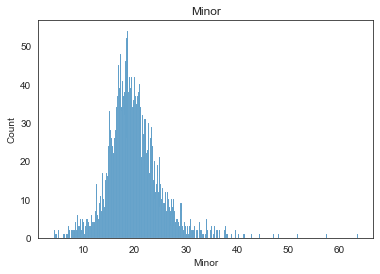

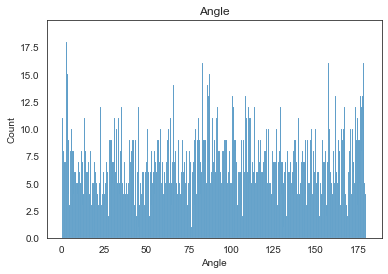

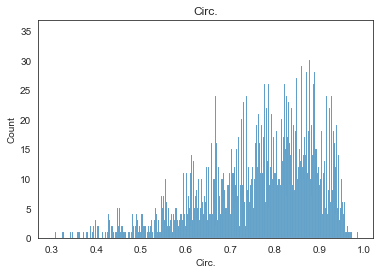

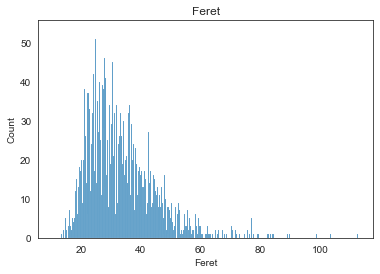

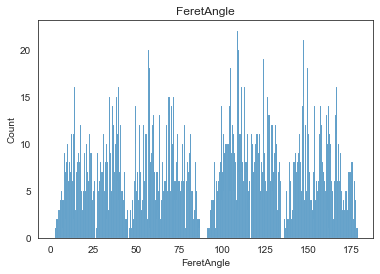

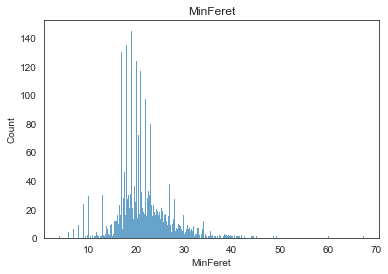

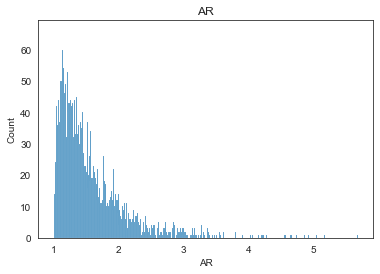

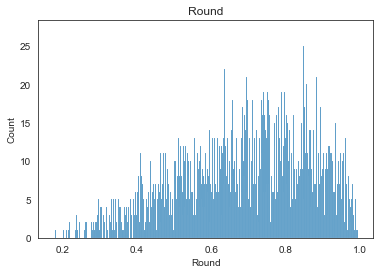

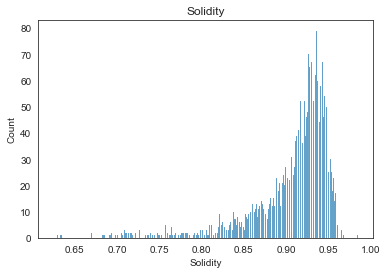

In [41]:
values=ms.iloc[:,3:]
import seaborn as sns
for i in range(values.shape[1]):
    sns.histplot(values.iloc[:,i],bins=500)
    plt.title(values.columns[i])
    plt.show()

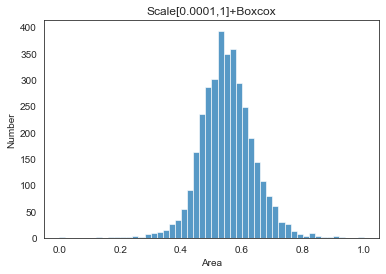

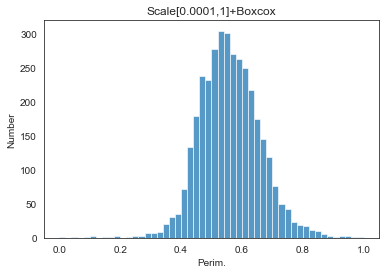

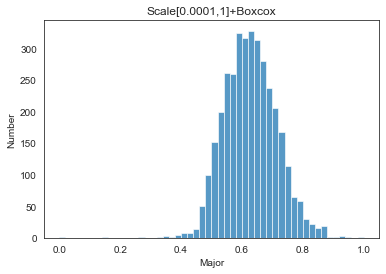

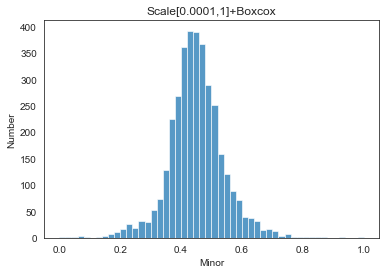

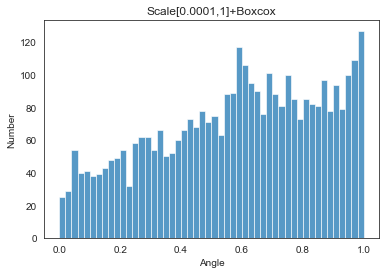

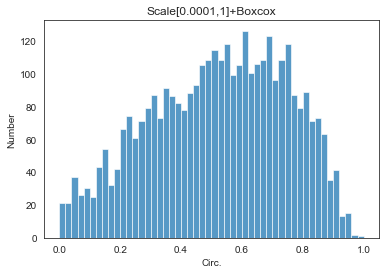

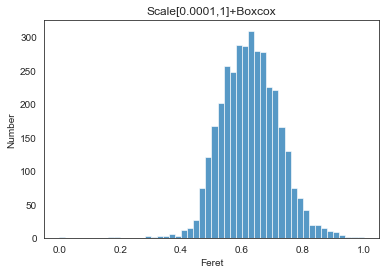

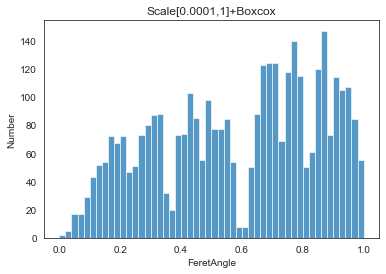

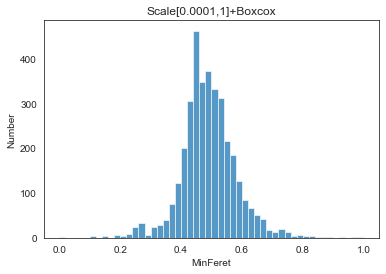

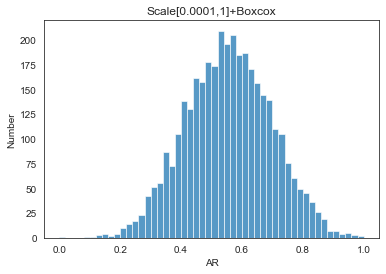

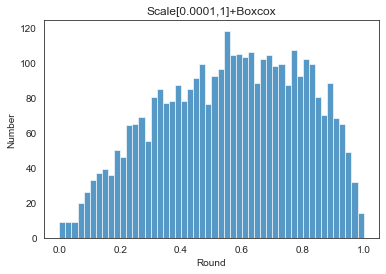

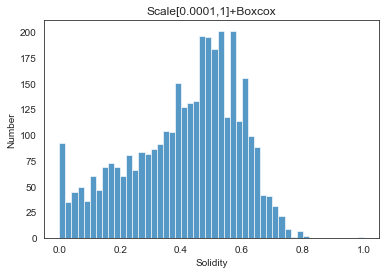

In [42]:
f=values
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import palettable
import scipy.stats as spstats
min_max_scaler = MinMaxScaler(feature_range=(0.0001,1))
fb = min_max_scaler.fit_transform(f)
fb=pd.DataFrame(fb)

for i in range(f.shape[1]):
    feature=np.array(fb.iloc[:,i])
    l,opt_lambda=spstats.boxcox(feature)
    #print('Optimal lambda value:', opt_lambda)
    f.iloc[:,i]=spstats.boxcox(fb.iloc[:,i],lmbda=opt_lambda)

fb= MinMaxScaler(feature_range=(0,1)).fit_transform(f)
fb= pd.DataFrame(fb)
fb.columns=values.columns

for i in range(fb.shape[1]):
    sns.histplot(fb.iloc[:,i],bins=50)
    #fig = plt.figure()
    #res = stats.probplot(feature.iloc[:,i], plot=plt)
    plt.title('Scale[0.0001,1]+Boxcox')
    plt.ylabel('Number')
    plt.xlabel(fb.columns[i])
    #plt.savefig(fb.columns[i])
    plt.show()

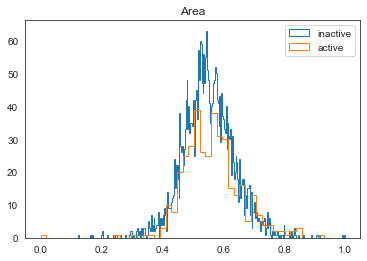

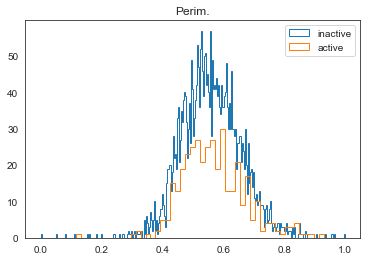

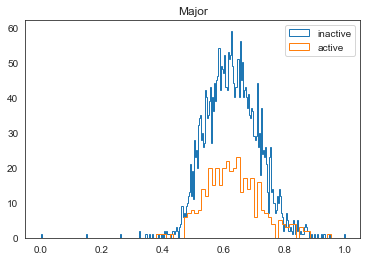

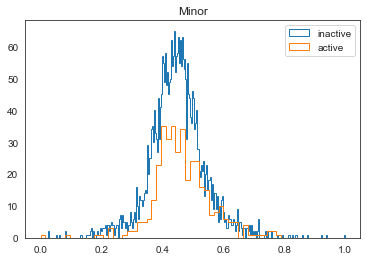

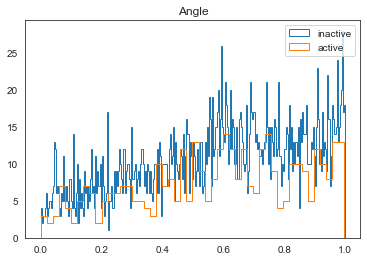

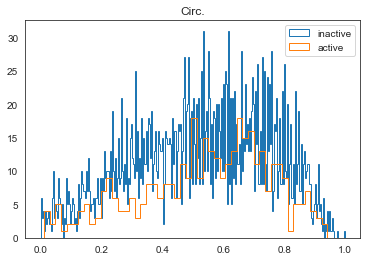

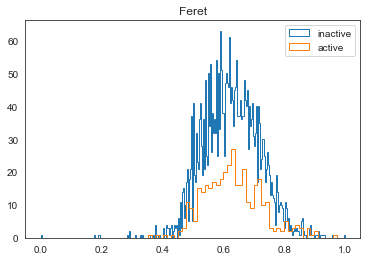

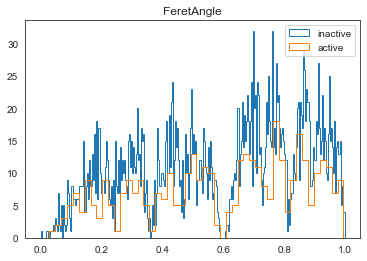

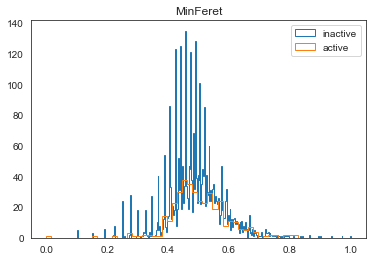

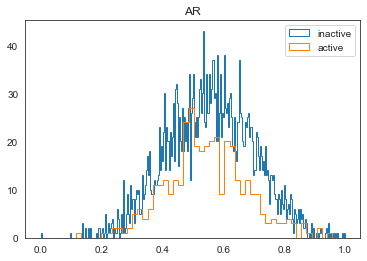

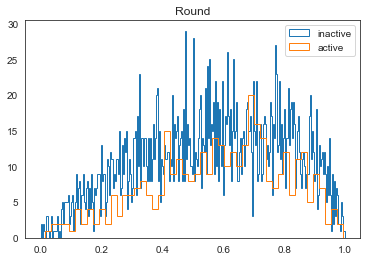

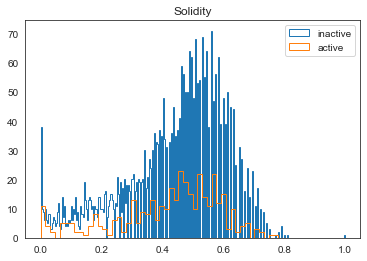

In [43]:
ms.index=fb.index
for i in range(12):
    plt.hist(fb[ms['Ac']=='inactive'].iloc[:,i],bins=300,label='inactive',histtype='step')
    plt.hist(fb[ms['Ac']=='active'].iloc[:,i],bins=50,label='active',histtype='step')
    plt.legend()
    plt.title(fb.columns[i])
    plt.show()

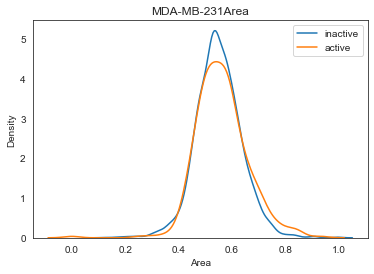

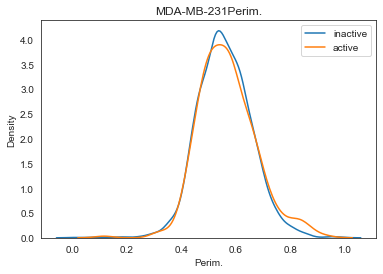

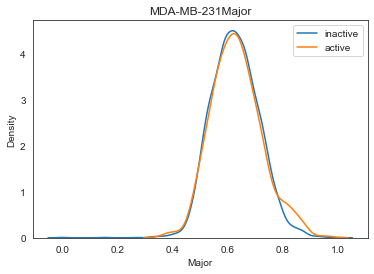

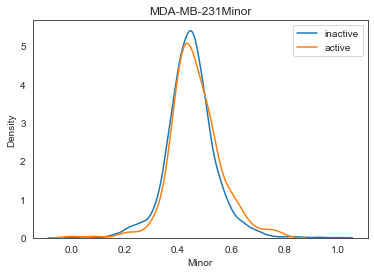

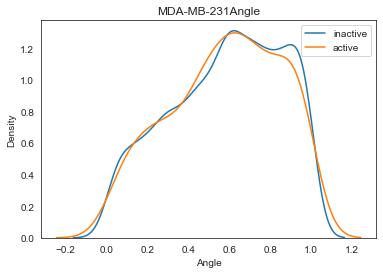

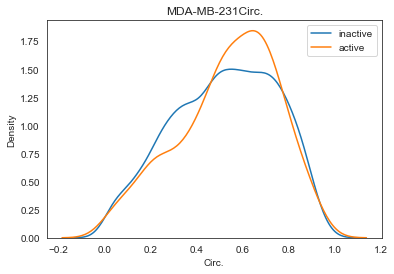

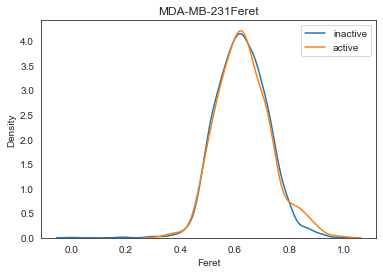

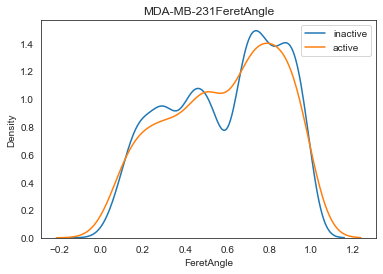

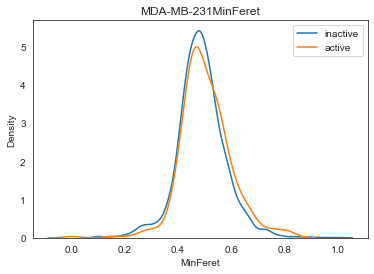

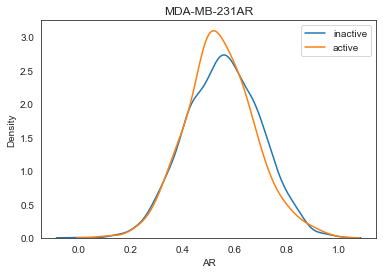

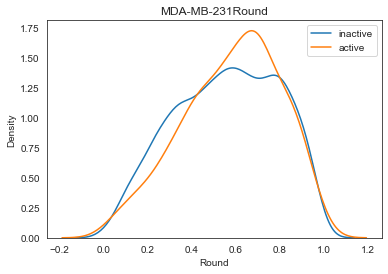

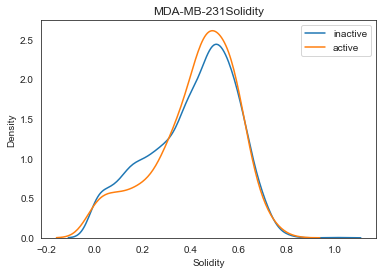

In [44]:
for i in range(12):
    sns.kdeplot(fb[ms['Ac']=='inactive'].iloc[:,i],label='inactive')
    sns.kdeplot(fb[ms['Ac']=='active'].iloc[:,i],label='active')

    plt.legend()
    plt.title('MDA-MB-231'+fb.columns[i])
    #plt.savefig('MDA-MB-231'+fb.columns[i]+'.png')
    plt.show()

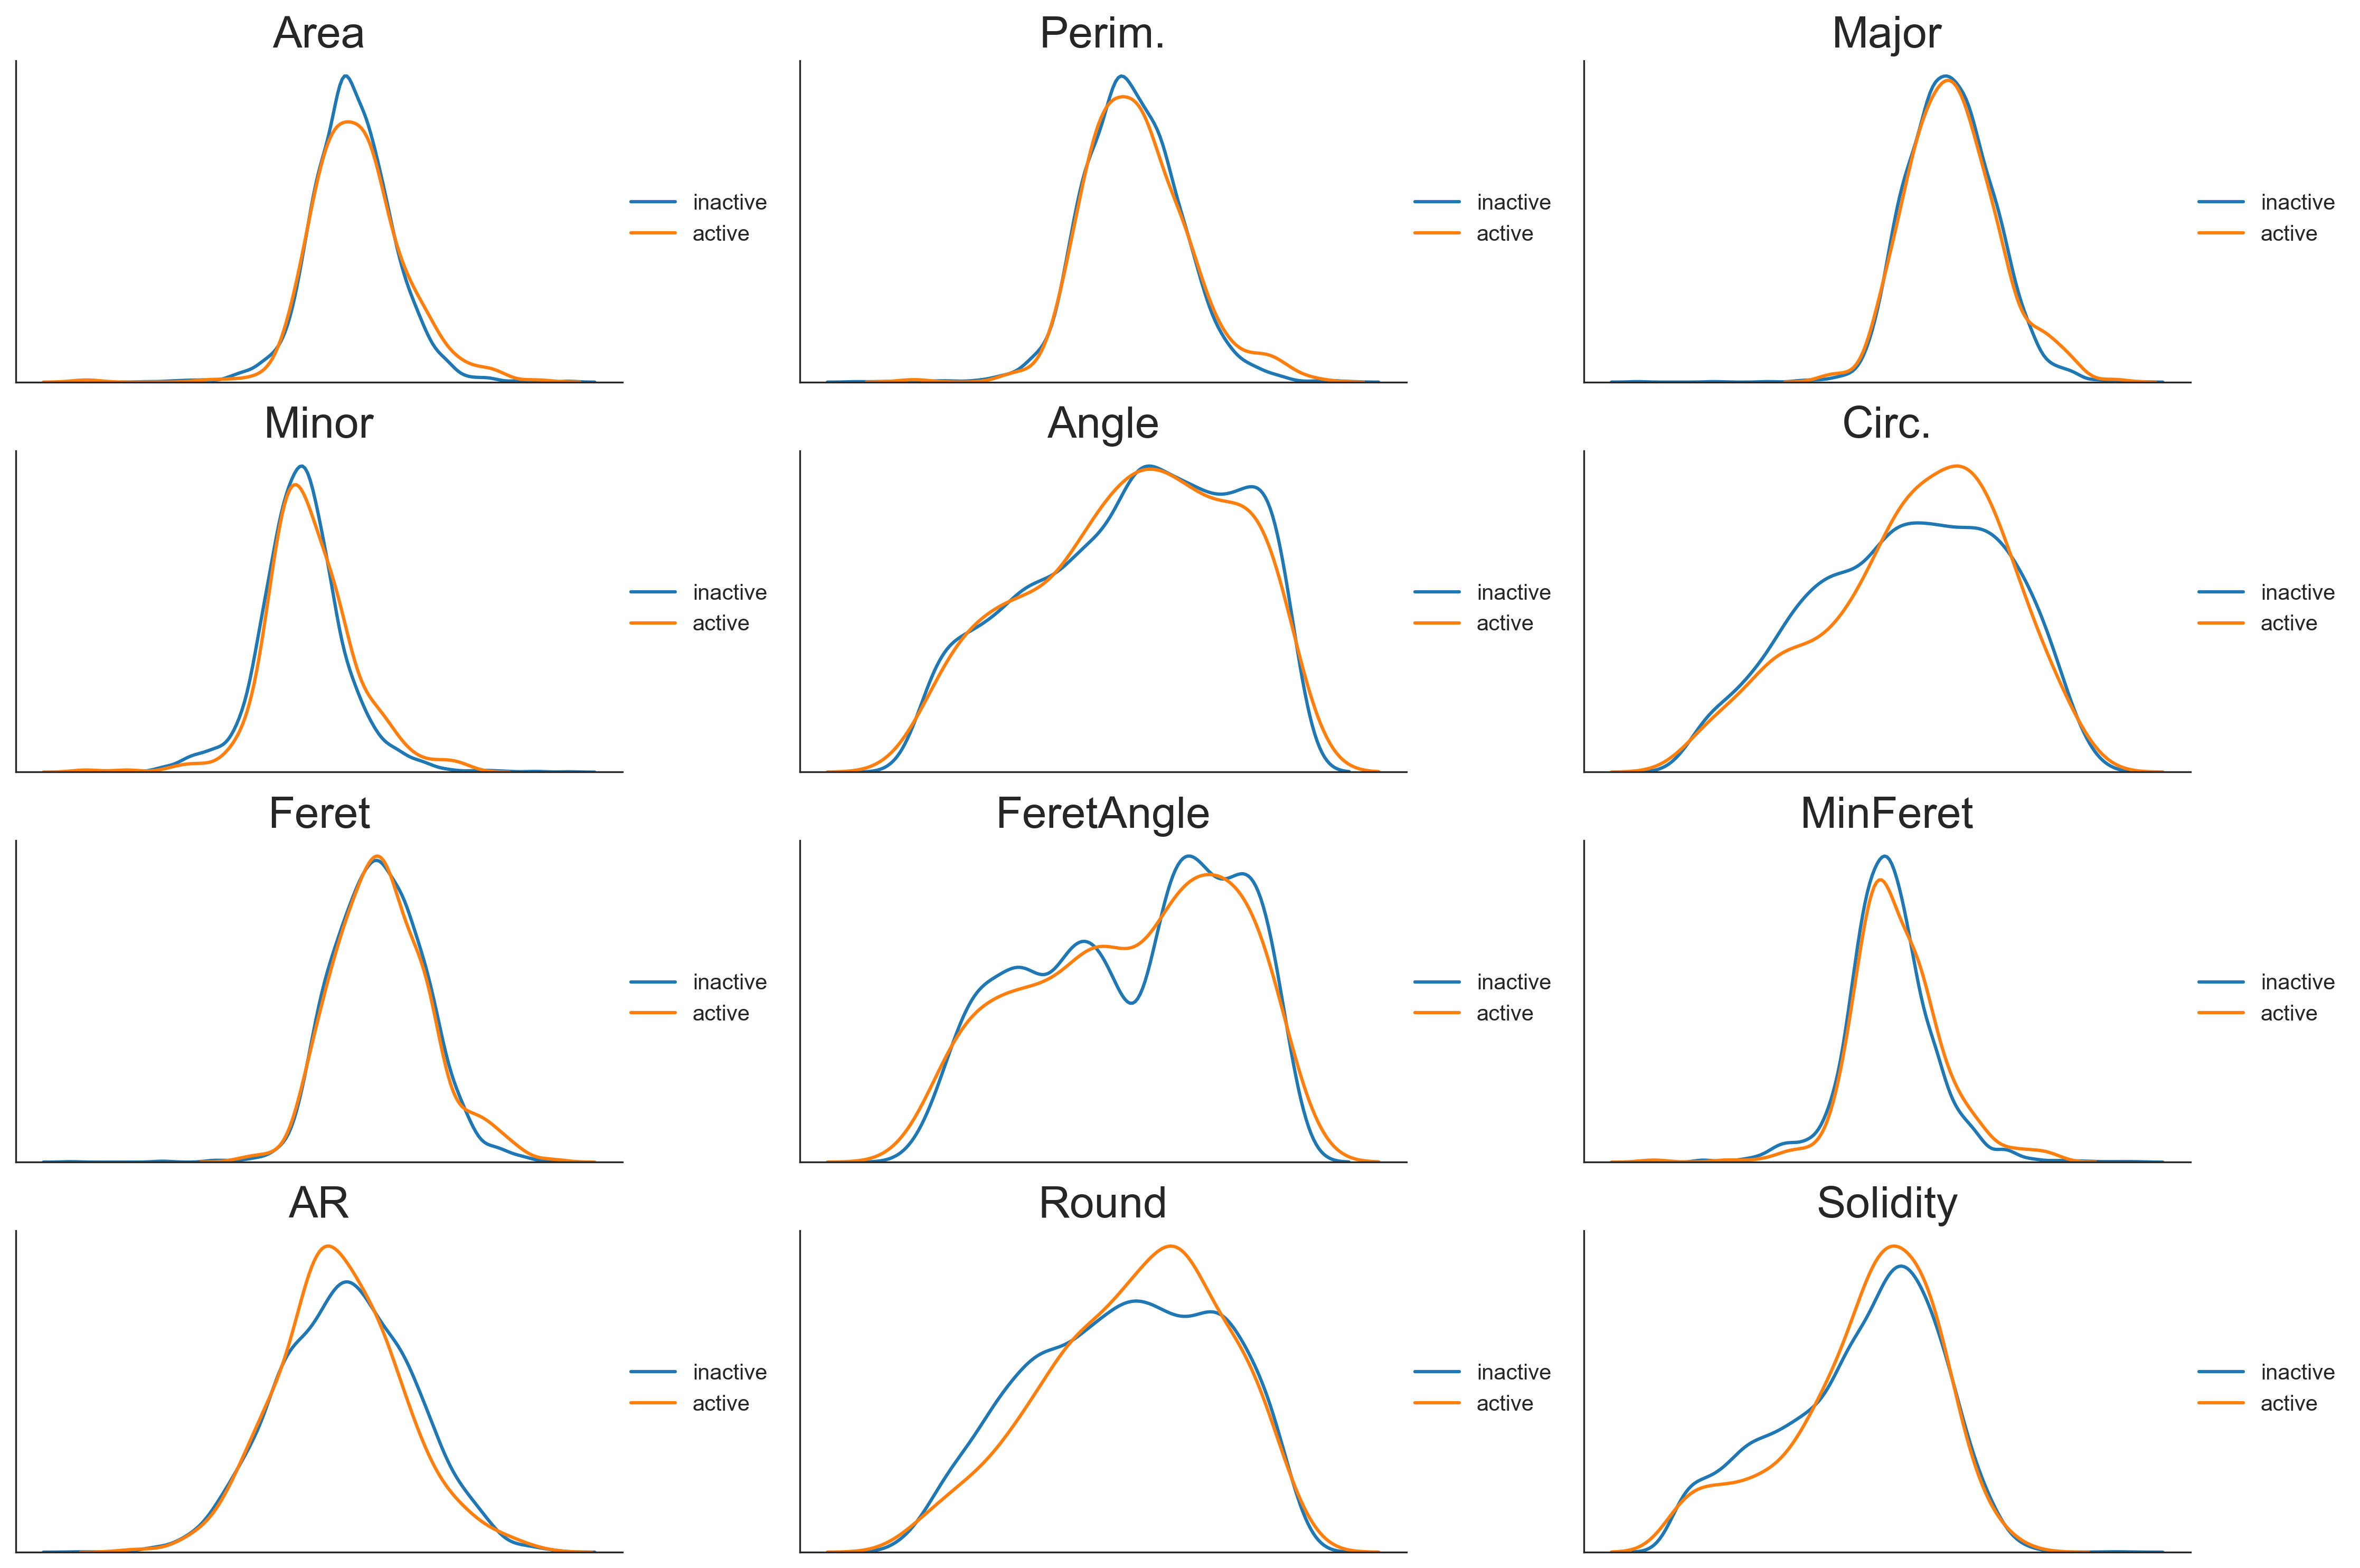

In [50]:
plt.figure(figsize=(15,10),dpi=300)
for i in range(fb.shape[1]):
    
    # Set up the plot
    plt.subplot(4, 3, i+1)
    
    # Draw the plot
    sns.kdeplot(fb[ms['Ac']=='inactive'].iloc[:,i],label='inactive')
    sns.kdeplot(fb[ms['Ac']=='active'].iloc[:,i],label='active')

    sns.despine(top=True, right=True, left=False, bottom=False)
    sns.set_style('white')
    # Title and labels
    plt.title(fb.columns[i],fontsize=20)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(None)
    plt.ylabel(None)
    #plt.legend(loc=[1,0.4],frameon=False)

plt.tight_layout()
plt.show()

Variance of PCA:
[0.14159722 0.11947879 0.03995344]
Variance Ratio:
[0.4049897  0.34172759 0.11427293]
Number of principle components: 3


Text(0.5, 1.0, 'Morph - PCA - 231')

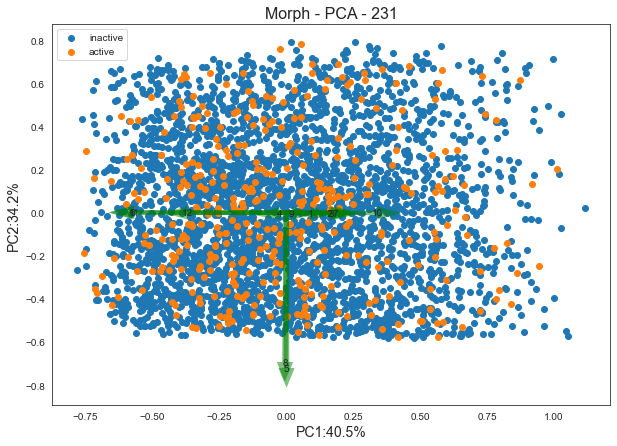

In [46]:
mcf_filt=ms
pca = PCA(n_components=0.8)
new_pca = pd.DataFrame(pca.fit_transform(fb))
print('Variance of PCA:')
print(pca.explained_variance_)

print('Variance Ratio:')
print(pca.explained_variance_ratio_) 
importance = pca.explained_variance_ratio_
c=pca.components_

#print('输出主成分系数阵:默认列是指标，行是指标在成为上的系数')
#print(pca.components_)

print('Number of principle components: {}'.format(pca.n_components_))

t0=new_pca[mcf_filt['Ac']=='inactive']
t1=new_pca[mcf_filt['Ac']=='active']

plt.figure(figsize=(10,7))

plt.scatter(t0.iloc[:,0],t0.iloc[:,1],marker='o',label='inactive')
plt.scatter(t1.iloc[:,0],t1.iloc[:,1],marker='o',label='active')
plt.xlabel(f'1st PC:{round(importance[0]*100,1)}%',fontsize=14)
plt.ylabel(f'2nd PC:{round(importance[1]*100,1)}%',fontsize=14)

kwargs={'linestyle':'-', 'lw':0.1, 'width':0.02} 
for i in range(c.shape[1]):
    plt.arrow(0,0,c[0,i],c[1,i],alpha=0.5,ec='green',fc='green',**kwargs)
    plt.text(c[0,i],c[1,i],f'{i+1}', ha="center", va="center")
plt.xlabel(f'PC1:{round(importance[0]*100,1)}%',fontsize=14)  
plt.ylabel(f'PC2:{round(importance[1]*100,1)}%',fontsize=14)
#plt.xlabel(r'MCF10A/MCF10A_TGFβ PC1',fontsize=14)  
#plt.ylabel(r'MCF10A/MCF10A_TGFβ PC2',fontsize=14)

plt.legend()
plt.title(r'Morph - PCA - 231',fontsize=16)

Text(0.5, 1.0, 'Morph - TSNE -231')

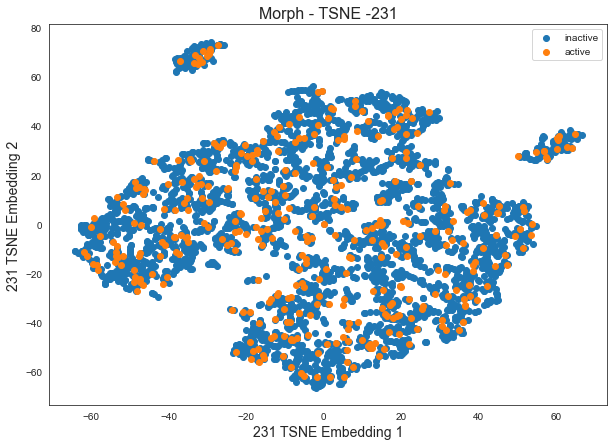

In [47]:
from sklearn.manifold import TSNE

tsne=TSNE()
new_tsne = pd.DataFrame(tsne.fit_transform(fb))

t1=new_tsne[mcf_filt['Ac']=='inactive']
t2=new_tsne[mcf_filt['Ac']=='active']

fig=plt.figure(figsize=(10,7))
ax=fig.add_subplot(111)

ax.scatter(t1.iloc[:,0],t1.iloc[:,1],label='inactive',marker='o')
ax.scatter(t2.iloc[:,0],t2.iloc[:,1],label='active',marker='o')

#ax.set_xlim([-1.5,1.5])
#ax.set_ylim([-0.75,1.25])
plt.xlabel(r'231 TSNE Embedding 1',fontsize=14)  
plt.ylabel(r'231 TSNE Embedding 2',fontsize=14)
plt.legend()

plt.title('Morph - TSNE -231',fontsize=16)

In [ ]:
f=ms_active.iloc[:,5:-1]
min_max_scaler = MinMaxScaler(feature_range=(0.0001,1))
fb = min_max_scaler.fit_transform(f)
fb=pd.DataFrame(fb)

for i in range(f.shape[1]):
    feature=np.array(fb.iloc[:,i])
    l,opt_lambda=spstats.boxcox(feature)
    #print('Optimal lambda value:', opt_lambda)
    f.iloc[:,i]=spstats.boxcox(fb.iloc[:,i],lmbda=opt_lambda)

fb= MinMaxScaler(feature_range=(0,1)).fit_transform(f)
fb= pd.DataFrame(fb)
fb.columns=values.columns

for i in range(fb.shape[1]):
    sns.histplot(fb.iloc[:,i],bins=50)
    #fig = plt.figure()
    #res = stats.probplot(feature.iloc[:,i], plot=plt)
    plt.title('Scale[0.0001,1]+Boxcox')
    plt.ylabel('Number')
    plt.xlabel(fb.columns[i])
    #plt.savefig(fb.columns[i])
    plt.show()

In [ ]:
fb

In [ ]:
pca = PCA(n_components=0.8)
new_pca = pd.DataFrame(pca.fit_transform(fb))
print('Variance of PCA:')
print(pca.explained_variance_)

print('Variance Ratio:')
print(pca.explained_variance_ratio_) 
importance = pca.explained_variance_ratio_
c=pca.components_

#print('输出主成分系数阵:默认列是指标，行是指标在成为上的系数')
#print(pca.components_)

print('Number of principle components: {}'.format(pca.n_components_))

t0=new_pca[ms_active['Type']==0]
t1=new_pca[ms_active['Type']==3]
t2=new_pca[ms_active['Type']==4]

plt.figure(figsize=(10,7))

plt.scatter(t0.iloc[:,0],t0.iloc[:,1],marker='o',label='Waving')
#plt.scatter(t1.iloc[:,0],t1.iloc[:,1],marker='o',label='Blinking-L')
plt.scatter(t2.iloc[:,0],t2.iloc[:,1],marker='o',label='Quiet')
plt.xlabel(f'1st PC:{round(importance[0]*100,1)}%',fontsize=14)
plt.ylabel(f'2nd PC:{round(importance[1]*100,1)}%',fontsize=14)

kwargs={'linestyle':'-', 'lw':0.1, 'width':0.02} 
#for i in range(c.shape[1]):
    #plt.arrow(0,0,c[0,i],c[1,i],alpha=0.5,ec='green',fc='green',**kwargs)
    #plt.text(c[0,i],c[1,i],f'{i+1}', ha="center", va="center")
plt.xlabel(f'PC1:{round(importance[0]*100,1)}%',fontsize=14)  
plt.ylabel(f'PC2:{round(importance[1]*100,1)}%',fontsize=14)
#plt.xlabel(r'MCF10A/MCF10A_TGFβ PC1',fontsize=14)  
#plt.ylabel(r'MCF10A/MCF10A_TGFβ PC2',fontsize=14)

plt.legend()
plt.title(r'Morph - PCA - Quiet/Waving',fontsize=16)

In [ ]:
from sklearn.manifold import TSNE

tsne=TSNE()
new_tsne = pd.DataFrame(tsne.fit_transform(fb))

t0=new_tsne[ms_active['Type']==0]
t1=new_tsne[ms_active['Type']==3]
t2=new_tsne[ms_active['Type']==4]

fig=plt.figure(figsize=(10,7))
ax=fig.add_subplot(111)

ax.scatter(t0.iloc[:,0],t0.iloc[:,1],label='Waving',marker='o')
#ax.scatter(t1.iloc[:,0],t1.iloc[:,1],label='Blinking-L',marker='o')
ax.scatter(t2.iloc[:,0],t2.iloc[:,1],label='Quiet',marker='o')


#ax.set_xlim([-1.5,1.5])
#ax.set_ylim([-0.75,1.25])
plt.xlabel(r'231 TSNE Embedding 1',fontsize=14)  
plt.ylabel(r'231 TSNE Embedding 2',fontsize=14)
plt.legend()

plt.title('Morph - TSNE -Quiet/Waving',fontsize=16)

In [ ]:
fb
fpc=pd.read_csv(r'C:\Users\Firefly\Desktop\Projection\pc_standard.csv')
fpc=fpc.iloc[:,1:]
fpc

In [ ]:
mb=fb
for i in range(mb.shape[1]):
    plt.figure(figsize=(10,7))
    color=mb.iloc[:,i]
    plt.scatter(fpc.iloc[:,0],fpc.iloc[:,1],c=color,cmap="BuGn",marker='o')
    plt.colorbar()
    plt.xlabel('Vm 1st PC')
    plt.ylabel('Vm 2nd PC')
    plt.title('Vm PC space colored by Morph '+mb.columns[i])
    #plt.savefig('Vm PC space colored by Morph '+mb.columns[i]+'.png')
    plt.show()

In [ ]:
plt.figure(figsize=(15,10),dpi=300)
for i in range(fb.shape[1]):
    
    # Set up the plot
    plt.subplot(4, 3, i+1)
    
    # Draw the plot
    color=mb.iloc[:,i]
    plt.scatter(fpc.iloc[:,0],fpc.iloc[:,1],c=color,cmap="BuGn",marker='o')
    plt.colorbar()
    # Title and labels
    plt.title(fb.columns[i],fontsize=20)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(None)
    plt.ylabel(None)
    #plt.legend(loc=[1,0.4],frameon=False)

plt.tight_layout()
plt.show()

C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

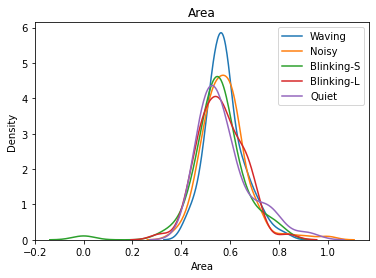

C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

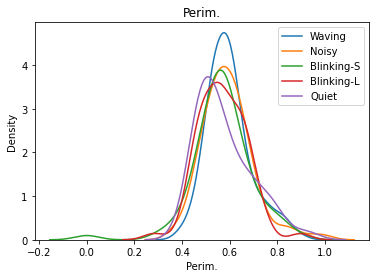

C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

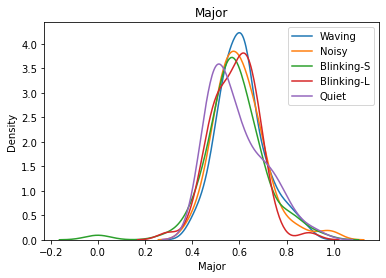

C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

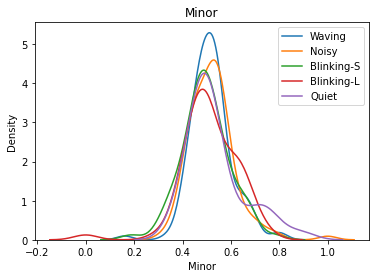

C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

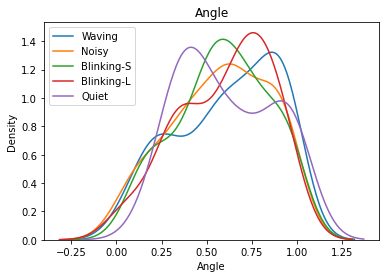

C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

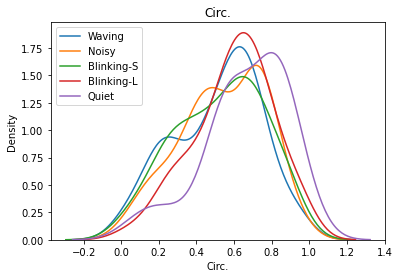

C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

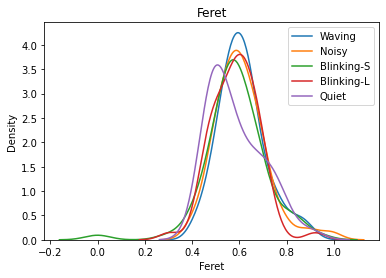

C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

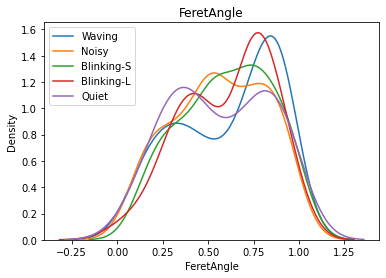

C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

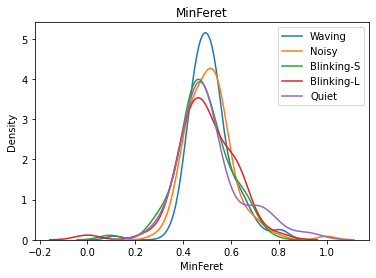

C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

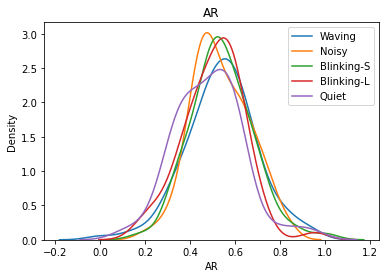

C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

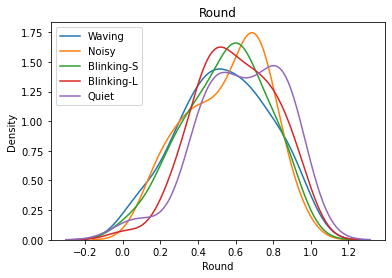

C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

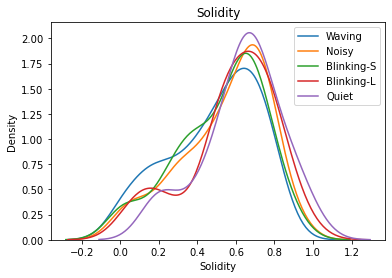

In [23]:
import seaborn as sns
ms_active
for i in range(12):
    sns.distplot(fb[ms_active['Type']==0].iloc[:,i],hist=False,kde=True,label='Waving')
    sns.distplot(fb[ms_active['Type']==1].iloc[:,i],hist=False,kde=True,label='Noisy')
    sns.distplot(fb[ms_active['Type']==2].iloc[:,i],hist=False,kde=True,label='Blinking-S')
    sns.distplot(fb[ms_active['Type']==3].iloc[:,i],hist=False,kde=True,label='Blinking-L')
    sns.distplot(fb[ms_active['Type']==4].iloc[:,i],hist=False,kde=True,label='Quiet')
    plt.legend()
    plt.title(ms_active.columns[i+5])
    plt.show()

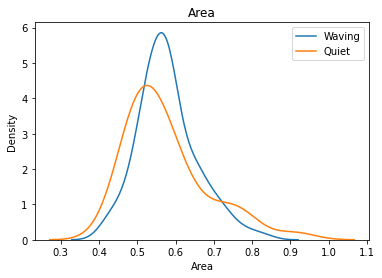

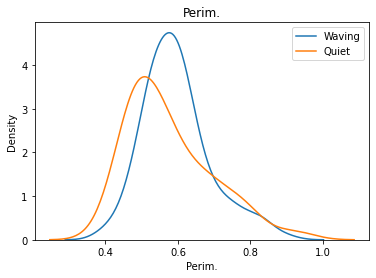

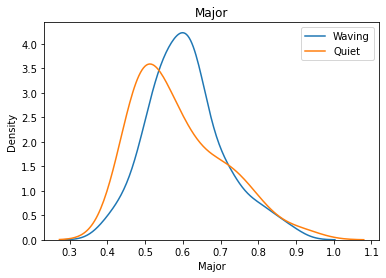

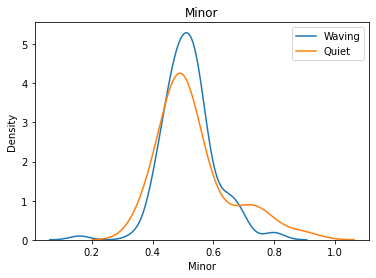

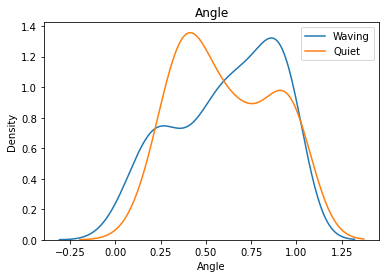

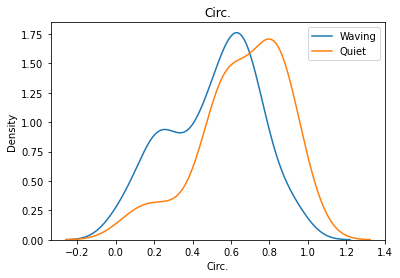

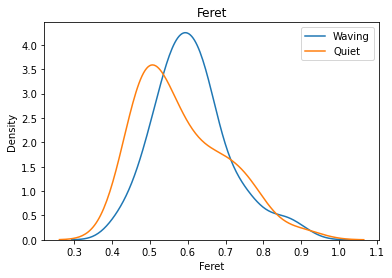

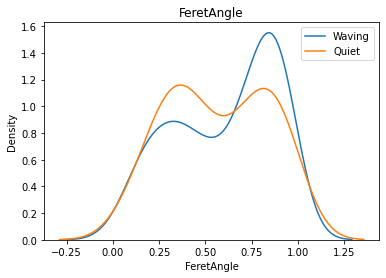

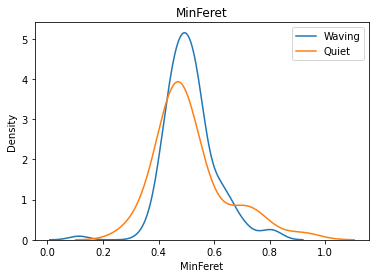

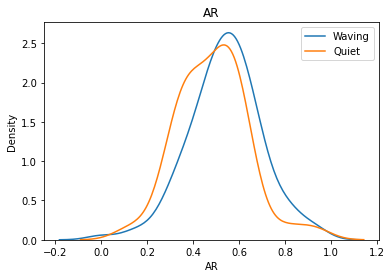

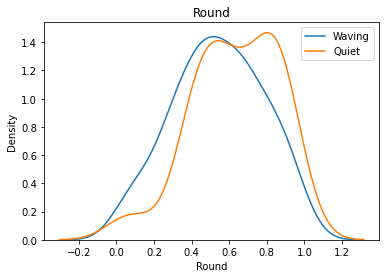

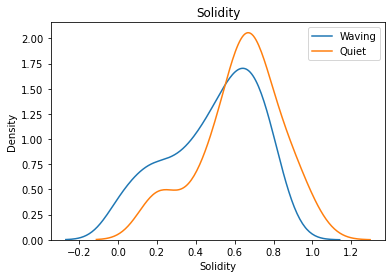

In [24]:
for i in range(12):
    sns.kdeplot(fb[ms_active['Type']==0].iloc[:,i],label='Waving')
    #sns.kdeplot(fb[ms_active['Type']==3].iloc[:,i],label='Blinking-L')
    sns.kdeplot(fb[ms_active['Type']==4].iloc[:,i],label='Quiet')
    plt.legend()
    plt.title(ms_active.columns[i+5])
    #plt.savefig(ms_active.columns[i+5])
    plt.show()

C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


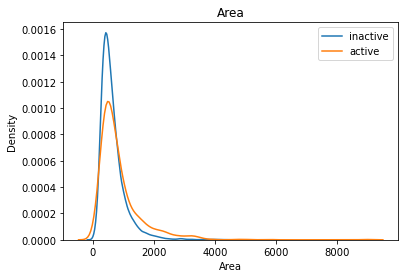

C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


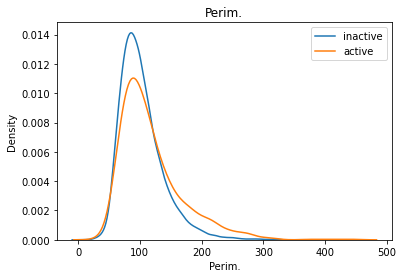

C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


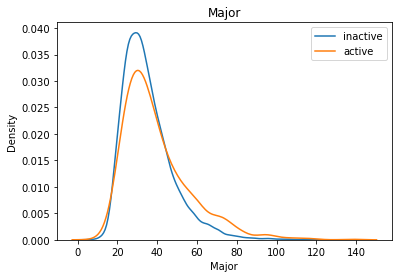

C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


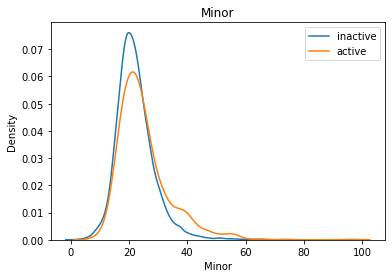

C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


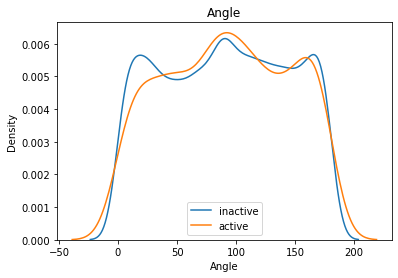

C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


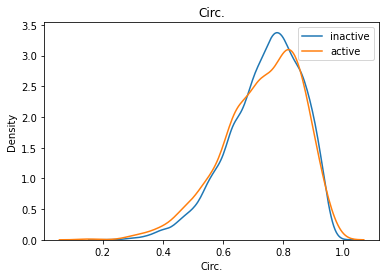

C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


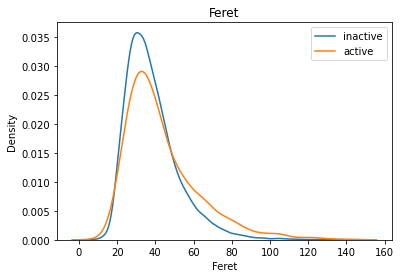

C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


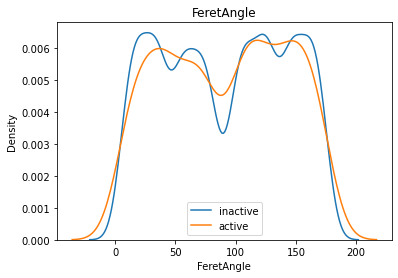

C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


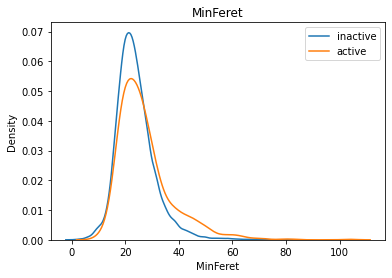

C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


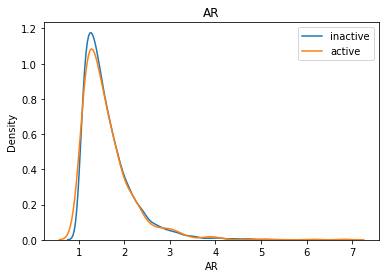

C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


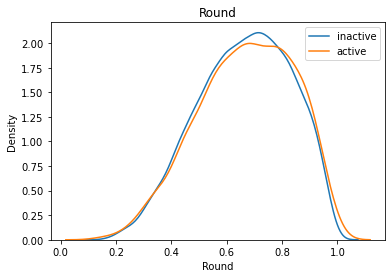

C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


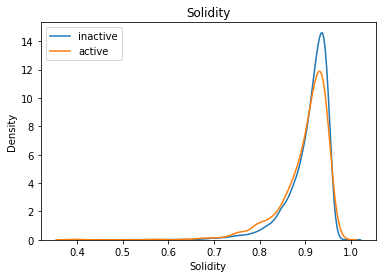

In [23]:
for i in range(12):
    sns.distplot(results[results['Ac']=='inactive'].iloc[:,i+5],label='inactive',kde=True,hist=False)
    sns.distplot(results[results['Ac']=='active'].iloc[:,i+5],label='active',kde=True,hist=False)
    #plt.legend(frameon=False)
    plt.title(results.columns[i+5],fontsize=20)
    plt.xlabel(None)
    plt.ylabel(None)
    plt.xticks([])
    plt.yticks([])
    plt.show()